### Using WATERSHED alogrithm

In [3]:
#Custom seeds with Watershed alogrithm

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

def display(image, h=10, w=8, cmap='gray'):
    figure = plt.figure(figsize=(h,w))
    ax = figure.add_subplot(111)
    ax.imshow(image, cmap='gray')

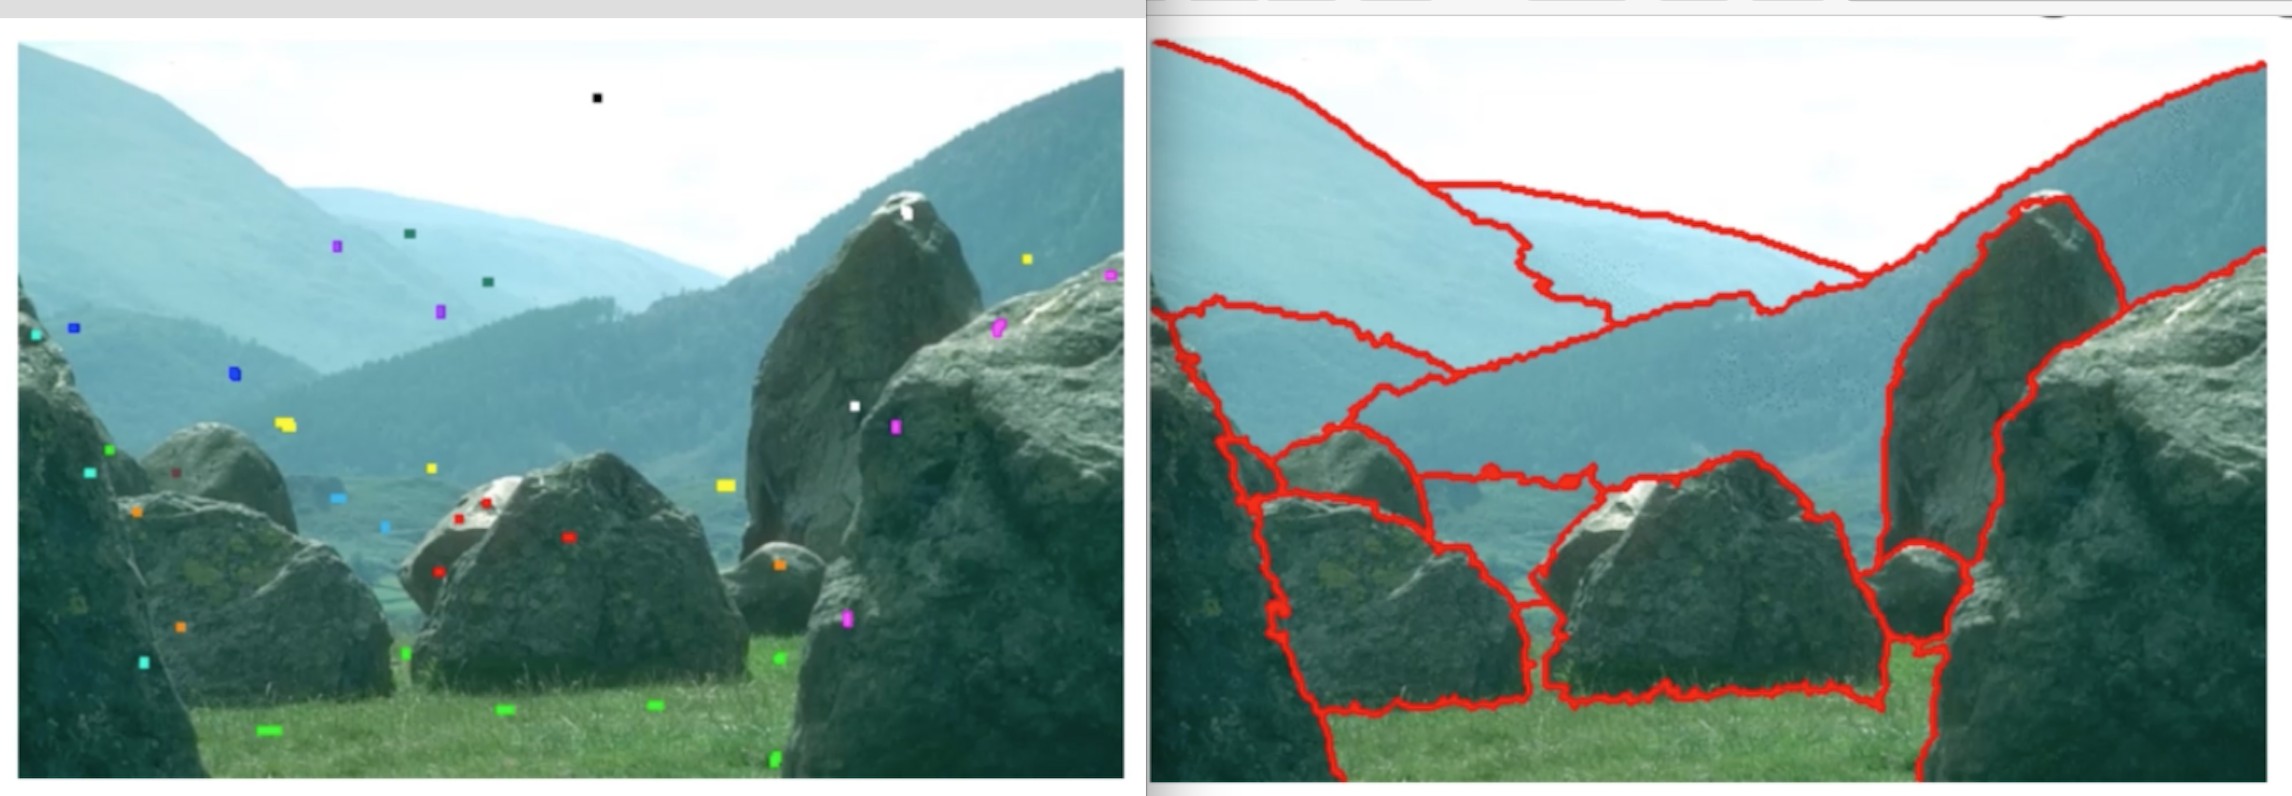

In [3]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection10.png', height=400, width=800)

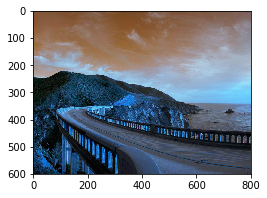

In [20]:
image_road = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/road_image.jpg')
image_road_copy = image_road.copy()
display(image_road,5,3)

In [3]:
image_road.shape

(600, 800, 3)

In [4]:
image_road.shape[:2]

(600, 800)

In [5]:
image_marker = np.zeros(image_road.shape[:2], dtype=np.int32)
segments = np.zeros(image_road.shape, dtype=np.uint8)

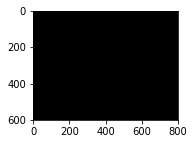

In [6]:
display(image_marker, 3,2)

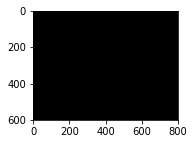

In [7]:
display(segments, 3,2)

In [8]:
image_marker.shape, segments.shape

((600, 800), (600, 800, 3))

#### Using colors

In [9]:
from matplotlib import cm
cm.tab10(0) # random R,G,B values with alpha)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [10]:
type(cm.tab10(0))

tuple

In [11]:
color_tuple = cm.tab10(0)
color_tuple

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [12]:
np.array(color_tuple[:3]) * 255

array([ 31., 119., 180.])

In [13]:
tuple(np.array(color_tuple[:3]) * 255)

(31.0, 119.0, 180.0)

In [14]:
def createRGB(i):
    return tuple(np.array(cm.tab10(i)[:3]) * 255)

In [15]:
my_colors= []
for i in range(10):
    my_colors.append(createRGB(i))

In [16]:
my_colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [2]:
# All code:

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

def display(image, h=10, w=8, cmap='gray'):
    figure = plt.figure(figsize=(h,w))
    ax = figure.add_subplot(111)
    ax.imshow(image, cmap='gray')
image_road = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/road_image.jpg')
image_road_copy = image_road.copy()


image_marker = np.zeros(image_road.shape[:2], dtype=np.int32)
segments = np.zeros(image_road.shape, dtype=np.uint8)

def createRGB(i):
    return tuple(np.array(cm.tab10(i)[:3]) * 255)

my_colors= []
for i in range(10):
    my_colors.append(createRGB(i))

# GLOBAL VARIABLES

# Number of makers:
n_markers = 10  # values -> 0-9

# Color choice
current_marker = 1

# markers updated by watershed
marker_updated = False

In [3]:
# MOUSE CALLBACK FUNCTION
def mouse_callback(event, x, y, flags, param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # Markers passed to the watershed alogrithm
        cv2.circle(image_marker, (x,y), 10, (current_marker), -1)
        
        # User sees on the road image
        cv2.circle(image_road_copy, (x,y), 10, (current_marker), -1)
                   
        marker_updated = True           


In [ ]:
# WHILE TRUE
                   
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)
            
while True:
    cv2.imshow('Watershed segments', segments) 
    cv2.imshow('Road Image', image_road_copy)  # image of road
                   
    #Close all windows
    k = cv2.waitKey(1)
    if k == 27:
        break
    
    # Clear all colors when 'c' is presses
    elif k == ord('c'):
        image_road_copy = image_road.copy()
        image_marker = np.zeros(image_road.shape[:2], dtype=np.int32)
        segments = np.zeros(image_road.shape, dtype=np.uint8)
                   
    # Update color choice (when user presses any number key)
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
                   
       
    # Update the markings
    if marker_updated:
        image_marker_copy = image_marker.copy()
        cv2.watershed(image_road, image_marker_copy)
            
        segments = np.zeros(image_road.shape, dtype=np.uint8)
                   
        for color in range(n_markers):
            # Coloring segments, numpy call
            segments[image_marker_copy == (color)] = my_colors[color]
                
cv2.destroyAllWindows()   

### TO DO: FIX THIS LATER

In [1]:
#END